<a href="https://colab.research.google.com/github/valesierrai/Integracion-de-Datos-y-Prospectiva/blob/main/Reto_5_VSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Reto 5: Modelos Borrosos**

##0. Se cargan las librerias de trabajo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1. Se carga la Base de Datos

In [ ]:
nxl = '/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/3. Perdida Productividad_Zonas(I) (1).xlsx'
XDB = pd.read_excel(nxl, sheet_name= 1)
XDB = XDB.dropna()
XDB.rename(columns={'Unnamed: 0': 'Fecha'}, inplace=True) #A la columna "Unnamed: 0" le ponemos fecha
XDB

,Fecha,Mensual,P.Semestral,Díaria,WD,Pérdida,Unnamed: 6,Frecuencia,Severidad,LDA
5,2000-06-01,64.955687,89.691966,2.165190,2.334810,118307.851160,1.0,91.0,118307.851160,1.076601e+07
6,2000-07-01,72.427269,85.403259,2.414242,2.085758,113101.344906,2.0,29.0,113101.344906,3.279939e+06
7,2000-08-01,88.738739,80.174771,2.957958,1.542042,72643.590729,3.0,26.0,72643.590729,1.888733e+06
8,2000-09-01,48.902974,80.807229,1.630099,2.869901,135696.649903,4.0,54.0,135696.649903,7.327619e+06
9,2000-10-01,58.218901,78.338778,1.940630,2.559370,141051.666123,5.0,100.0,141051.666123,1.410517e+07
...,...,...,...,...,...,...,...,...,...,...
235,2019-08-01,105.180180,97.381119,3.506006,0.993994,57160.931270,231.0,95.0,57160.931270,5.430288e+06
236,2019-09-01,83.544612,100.461066,2.784820,1.715180,105829.155694,232.0,57.0,105829.155694,6.032262e+06
237,2019-10-01,87.621163,97.811613,2.920705,1.579295,104128.455850,233.0,29.0,104128.455850,3.019725e+06
238,2019-11-01,79.481743,93.194728,2.649391,1.850609,87650.940889,234.0,13.0,87650.940889,1.139462e+06


In [ ]:
#Se definien las variables de trabajo
XDB = np.array(XDB[['Frecuencia', 'Severidad']])
print(XDB)

[[ 9.10000000e+01  1.18307851e+05]
 [ 2.90000000e+01  1.13101345e+05]
 [ 2.60000000e+01  7.26435907e+04]
 [ 5.40000000e+01  1.35696650e+05]
 [ 1.00000000e+02  1.41051666e+05]
 [ 4.00000000e+01  7.20468098e+04]
 [ 3.90000000e+01  1.23761138e+05]
 [ 6.00000000e+00  2.53934760e+05]
 [ 9.30000000e+01  1.76829203e+05]
 [ 3.30000000e+01  1.28591408e+05]
 [ 6.50000000e+01  1.16653136e+05]
 [ 9.40000000e+01  3.93577439e+04]
 [ 5.10000000e+01  5.91772264e+04]
 [ 5.50000000e+01  4.73744696e+04]
 [ 5.00000000e+01  6.86709416e+04]
 [ 1.20000000e+01  6.48537704e+04]
 [ 8.70000000e+01  4.09170630e+04]
 [ 5.20000000e+01  8.48853150e+04]
 [ 2.90000000e+01 -1.83812367e+05]
 [ 5.20000000e+01  2.47449753e+05]
 [ 9.80000000e+01  1.91986214e+05]
 [ 2.50000000e+01 -4.95783301e+04]
 [ 7.00000000e+01  3.76868344e+04]
 [ 2.10000000e+01  3.88587846e+03]
 [ 2.90000000e+01  3.58358908e+04]
 [ 2.00000000e+00  2.72742653e+03]
 [ 2.10000000e+01  9.75385781e+04]
 [ 1.80000000e+01  3.99692882e+04]
 [ 4.90000000e+01  2

##2. Proceso de Clústerización de las Variables

In [ ]:
#Semilla
np.random.seed(42)

#Cualidades por variable
NC=5

**Clusterización de los Eventos (Frecuencia)**

In [ ]:
mkmf = KMeans(n_clusters=NC, init='random',random_state=42)
mkmf.fit(XDB[:,0].reshape(-1,1))

XCf = mkmf.cluster_centers_

#Los organizamos de menor a mayor
XCf = np.array(sorted(XCf))
print("Los clústers son: \n", XCf.T)

#Labels - Cualidades
lbf= ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']
print("Las cualidades son: \n", lbf)

Los clústers son: 
 [[10.84       31.95744681 48.69387755 69.15555556 90.02272727]]
Las cualidades son: 
 ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']


In [ ]:
#Se busca la base de cada conjunto borroso (Valor de Pertenencia)
sigmaf = np.zeros((NC, 1))

for j in range(NC):
  sigmaf[j,]= np.sum(np.abs(XCf-XCf[j]))/4

print("La base de los conjuntos es: \n", sigmaf.T)

La base de los conjuntos es: 
 [[49.1174018  33.27931669 29.095209   34.21062851 49.86100729]]


**Clusterización de la Severidad -> Gasto Promedio por Evento**

In [ ]:
mkms = KMeans(n_clusters=NC, init='random',random_state=42)
mkms.fit(XDB[:,1].reshape(-1,1))

XCs = mkms.cluster_centers_

#Los organizamos de menor a mayor
XCs = np.array(sorted(XCs))
print("Los clústers son: \n", XCs.T)

#Labels - Cualidades
lbs= ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']
print("Las cualidades son: \n", lbs)

Los clústers son: 
 [[-218364.1021269   -82368.50392072   30318.32838028  101895.40697602
   210153.64372096]]
Las cualidades son: 
 ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']


In [ ]:
#Se busca la base de cada conjunto borroso (Valor de Pertenencia)
sigmas = np.zeros((NC, 1))

for j in range(NC):
  sigmas[j,]= np.sum(np.abs(XCs-XCs[j]))/4

print("La base de los conjuntos es: \n", sigmas.T)

La base de los conjuntos es: 
 [[283363.82091604 181367.1222614  153195.41418615 171089.68383508
  252283.36139379]]


**Se procede con la obtención del mapa de pérdidas - Matriz de Pérdidas**

<Figure size 640x480 with 0 Axes>

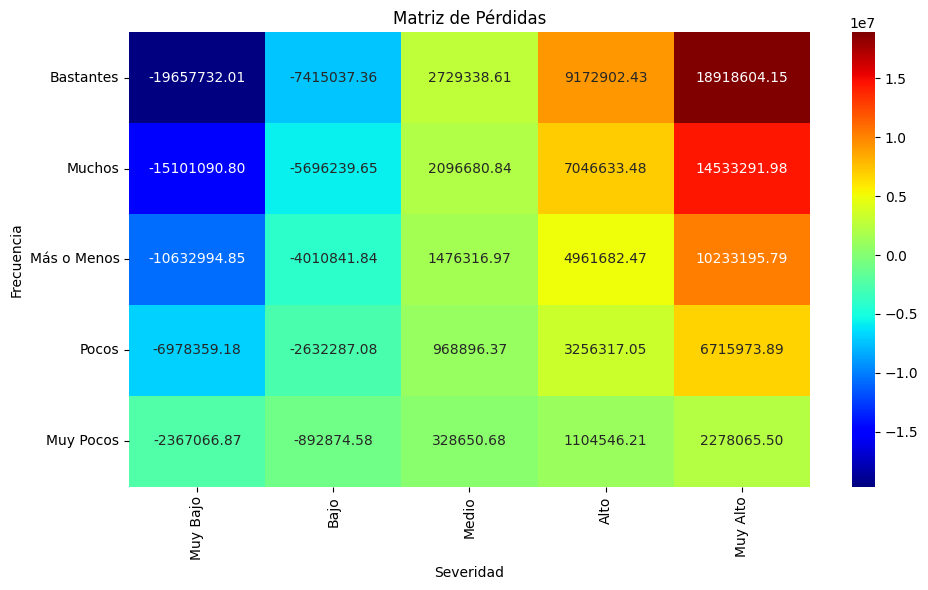

In [ ]:
MP = np.outer(XCf, XCs) #Convolución - Multiplicar todo con todo

MP_ordenada= MP[::-1,:] #Inversión Vertical

#Reorganizamos también las etiquetas de frecuencia en el mismo orden
lbf_ordenada = lbf[::-1]

#Graficamos
plt.figure()
plt.figure(figsize=(10, 6))
sns.heatmap(MP_ordenada, annot=True, cmap= 'jet', fmt= '.2f')
plt.title('Matriz de Pérdidas')
plt.xlabel('Severidad')
plt.ylabel('Frecuencia')
plt.xticks(np.arange(len(lbs))+ 0.5,lbs, rotation=90)
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.tight_layout()
plt.show()

##**Muestreo de las Variables Aleatorias de Frecuencia y Severidad (Muestreo de la Pérdida a un 99.9%)**

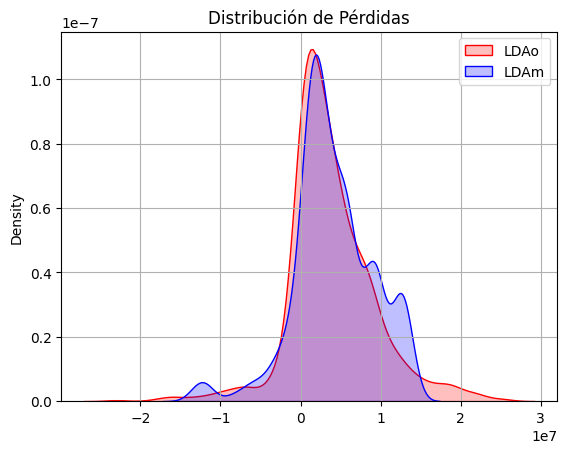

In [ ]:
#DataFrame de Frecuencia
dff= pd.DataFrame(XDB[:,0])

#DataFrame de Severidad
dfs= pd.DataFrame(XDB[:,1])

#Se procede con el muestreo
Xfm= np.array(dff.sample(n=1000, replace = True))
Xsm= np.array(dfs.sample(n=1000, replace = True))

#Distribución agregada de las Pérdidas - Loss Distribution Approach
XLDAm= np.zeros((1000,1))#Distribución agregada de pérdidas borrosa
XLDA= np.zeros((1000,1)) #Distribución agregada de pérdidas original

for k in range(1000):
  #print(k, Xfm[k], Xsm[k], Xfm[k]*Xsm[k])
  VPf = np.exp(-0.5*((XCf-Xfm[k])/sigmaf)**2)
  VPs = np.exp(-0.5*((XCs-Xsm[k])/sigmas)**2)
  MB= np.outer(VPf, VPs) #Matriz Borrosa

  #Buscamos los puntos de máximo pertenencia
  VMB = np.array(sorted(MB.flatten(), reverse= True))
  MT = np.zeros((5,5))

  for i in range(4):              #Digame donde están los 4 valores de pertenencia más grandes
    MT[np.where(MB==VMB[i])] = 1

  XLDAm[k]=np.sum(MP*MB*MT)/np.sum(MB*MT) #Pérdida Borrosa - Estructura Estadística de las Variables
  XLDA[k]= Xfm[k]*Xsm[k] #Pérdida Matemática Simple

plt.figure()
sns.kdeplot(x=XLDA.flatten(), fill= True, color='red', label='LDAo')
sns.kdeplot(x=XLDAm.flatten(), fill= True, color='blue', label='LDAm')
plt.title('Distribución de Pérdidas')
plt.legend()
plt.grid()
plt.show()

##**Repositorio para las Matrices de Impacto y Gestión**

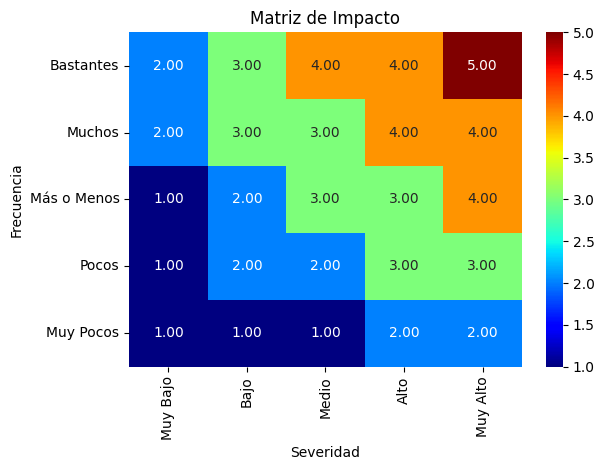

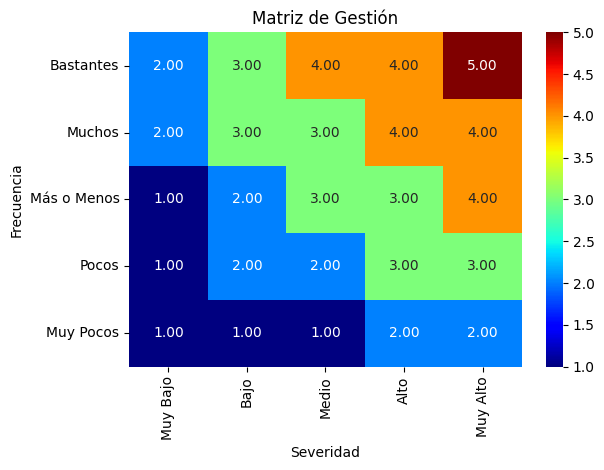

In [ ]:
#Se crea la matriz de impacto
MI=np.array([[1,1,1,2,2],
             [1,2,2,3,3],
             [1,2,3,3,4],
             [2,3,3,4,4],
             [2,3,4,4,5]])

MI_ordenada= MI[::-1, :]

#La matriz de gestión es utilizada para mitigar el impacto
NG=1 #Nivel de Gestion 1
MG=MI.astype(float).copy()  #Matriz de Gestión
MG[(MG>1)& (MG<5)]*=NG
MG_ordenada= MG[::-1, :]

#Matriz de Impacto
plt.figure()
sns.heatmap(MI_ordenada, annot=True, cmap='jet', fmt= '.2f')
plt.title('Matriz de Impacto')
plt.xlabel('Severidad')
plt.ylabel('Frecuencia')
plt.xticks(np.arange(len(lbs))+ 0.5,lbs, rotation=90)
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.tight_layout()

#Matriz de Gestión
plt.figure()
sns.heatmap(MG_ordenada, annot=True, cmap='jet', fmt= '.2f')
plt.title('Matriz de Gestión')
plt.xlabel('Severidad')
plt.ylabel('Frecuencia')
plt.xticks(np.arange(len(lbs))+ 0.5,lbs, rotation=90)
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.tight_layout()

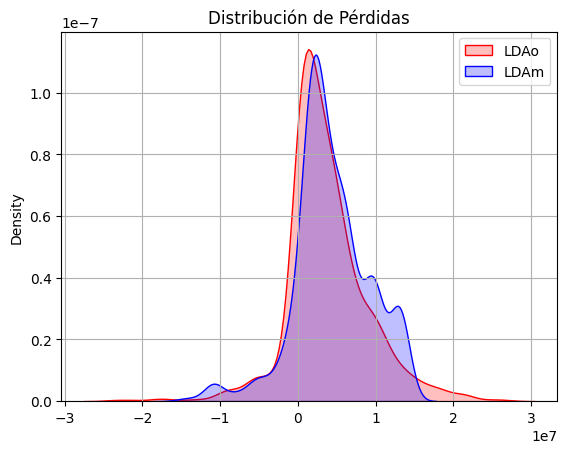

In [ ]:
#Distribución de Pérdidas con MI y MG

#DataFrame de Frecuencia
dff= pd.DataFrame(XDB[:,0])

#DataFrame de Severidad
dfs= pd.DataFrame(XDB[:,1])

#Se procede con el muestreo
Xfm= np.array(dff.sample(n=1000, replace= True))
Xsm= np.array(dfs.sample(n=1000, replace= True))

#Distribución agregada de las Pérdidas - Loss Distribution Approach
XLDAm= np.zeros((1000,1))#Distribución agregada de pérdidas borrosa
XLDA= np.zeros((1000,1)) #Distribución agregada de pérdidas original

for k in range(1000):
  #print(k, Xfm[k], Xsm[k], Xfm[k]*Xsm[k])
  VPf = np.exp(-0.5*((XCf-Xfm[k])/sigmaf)**2)
  VPs = np.exp(-0.5*((XCs-Xsm[k])/sigmas)**2)
  MB= np.outer(VPf, VPs) #Matriz Borrosa

  #Buscamos los puntos de máximo pertenencia
  VMB = np.array(sorted(MB.flatten(), reverse= True))
  MT = np.zeros((5,5))

  for i in range(4):              #Digame donde están los 4 valores de pertenencia más grandes
    MT[np.where(MB==VMB[i])] = 1

  XLDAm[k]=np.sum(MP*MB*MT*MI)/np.sum(MB*MT*MG) #Pérdida Borrosa - Estructura Estadística de las Variables
  XLDA[k]= Xfm[k]*Xsm[k] #Pérdida Matemática Simple

plt.figure()
sns.kdeplot(x=XLDA.flatten(), fill= True, color='red', label='LDAo')
sns.kdeplot(x=XLDAm.flatten(), fill= True, color='blue', label='LDAm')
plt.title('Distribución de Pérdidas')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Importamos Librerias Adicionales
from scipy.stats import skew

#Asimetría
valor_skew_m= skew(XLDAm)
print('Skew Gestionados:', valor_skew_m)
valor_skew = skew(XLDA)
print('Skew Originales:', valor_skew)

#Pérdidas Esperadas
u_m = np.mean(XLDAm)
print('Pérdidas Esperadas Gestionados:', u_m)
u = np.mean(XLDA)
print('Pérdidas Esperadas Originales:', u)

#OpVar (Péridas Catastróficas)
OpVar_m= np.percentile(XLDAm, 0.999)
print('OpVar Gestionados:', OpVar_m)
OpVar= np.percentile(XLDA, 0.999)
print('OpVar Originales:', OpVar)

#Pérdidas No Esperadas
PNE_m = (u_m+OpVar_m)/2
print('Pérdidas No Esperadas Gestionados:', PNE_m)
PNE = (u+OpVar)/2
print('Pérdidas No Esperadas Originales:', PNE)

Skew Gestionados: [-0.36022711]
Skew Originales: [0.27789451]
Pérdidas Esperadas Gestionados: 4274835.1748224525
Pérdidas Esperadas Originales: 3714149.0892390385
OpVar Gestionados: -10818159.5133398
OpVar Originales: -9521307.200692631
Pérdidas No Esperadas Gestionados: -3271662.169258674
Pérdidas No Esperadas Originales: -2903579.0557267964


In [ ]:
#Realizamos una tabla con los resultados
data = {
    'Métrica/Datos': ['Media/Pérdidas Esperadas', 'Pérdidas No Esperadas', 'OpVar/Pérdidas Catastróficas', 'Asimetría'],
    'Gestionados': [u_m, OpVar_m, PNE_m, valor_skew_m],
    'Originales': [u, OpVar, PNE, valor_skew]}

data = pd.DataFrame(data)
data

,Métrica/Datos,Gestionados,Originales
0,Media/Pérdidas Esperadas,4274835.174822,3714149.089239
1,Pérdidas No Esperadas,-10818159.51334,-9521307.200693
2,OpVar/Pérdidas Catastróficas,-3271662.169259,-2903579.055727
3,Asimetría,[-0.360227106166766],[0.2778945070263424]


##**Análisis de Resultados**

De acuerdo con las matrices de gestión e impacto implementadas para la mitigación de los riesgos en las operaciones de la empresa del sector palmero, se puede observar que la gestión 1:1, incrementa las pérdidas esperadas a 4274835.174822, el OpVar a -3271662.169259, las pérdidas no esperada a -10818159.51334, y el coeficiente de asimetría a -0.360227106166766. Esto indica un aumento generalizado de riesgo, puesto que se toma en cuenta la exposición a pérdidas catastróficas, las no esperadas y las esperadas. Ya que, en comparación con la distribución de pérdidas original, se obtienen valores menores, siendo las pérdidas esperadas 3714149.089239, el OpVar -2903579.055727, las pérdidas no esperadas -9521307.200693, y el coeficiente de asimetría 0.2778945070263424.